In [1]:
# import all packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

## Gather

In [2]:
# gather csv file
tae=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#open url and download the file, then read
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
ip = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

with open('tweet_json.txt','w+') as file:
    for tweet_id in tae['tweet_id']:
        try:
            tweet = api.get_status(str(tweet_id), tweet_mode = 'extended') 
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue
   

In [4]:
#get data from tweet_json
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)# load in strying format
            tweets_data.append(tweet)
        except:
            continue
df_tweets= pd.DataFrame(tweets_data)


df_tweets = df_tweets[['id','retweet_count','favorite_count','retweeted_status']]

In [5]:
df_tweets

,id,retweet_count,favorite_count,retweeted_status
0,892420643555336193,8627,38928,NaN
1,892177421306343426,6338,33332,NaN
2,891815181378084864,4207,25114,NaN
3,891689557279858688,8752,42277,NaN
4,891327558926688256,9509,40436,NaN
5,891087950875897856,3149,20281,NaN
6,890971913173991426,2098,11894,NaN
7,890729181411237888,19126,65780,NaN
8,890609185150312448,4315,27852,NaN
9,890240255349198849,7506,32040,NaN


## Assess

twitter-archive-enhanced.csv :

In [6]:
tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
tae.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2059,671186162933985280,NaN,NaN,2015-11-30 04:37:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sparky. That's his pancake now. He wil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671186162...,10,10,Sparky,None,None,None,None
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None
2206,668631377374486528,NaN,NaN,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,None,None,None,None
1366,702671118226825216,NaN,NaN,2016-02-25 01:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rambo &amp; Kiwi. Rambo's the pup with th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702671118...,10,10,Rambo,None,None,None,None
786,774757898236878852,NaN,NaN,2016-09-10 23:54:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. She's a Beneboop Cumbersplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774757898...,12,10,Finley,None,None,None,None


In [9]:
tae.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

- doggo, floofer, pupper and puppo should reshape as one column under "type" instead of 3 columns
- in_reply_to_status_id  , in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id should be object instead of float
- timestamp, retweeted_status_timestamp should be timestamp instead of object
- inconsistence with null object: none and NaN
- invalid names: 'a','not','one','an','quiet','very','my','his','unacceptable','this','all','old','the','by'
- some records have retweet_status_id, need to exclude  

image_predictions.tsv

In [10]:
ip

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
ip.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1099,720415127506415616,https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg,1,Rottweiler,0.990312,True,black-and-tan_coonhound,0.002495,True,American_black_bear,0.001733,False
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
507,676089483918516224,https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg,1,bull_mastiff,0.743808,True,boxer,0.106697,True,American_Staffordshire_terrier,0.042335,True
2042,885528943205470208,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,1,pug,0.369275,True,Labrador_retriever,0.265835,True,kuvasz,0.134697,True
356,672604026190569472,https://pbs.twimg.com/media/CVWRyylWIAAMltv.jpg,1,toy_poodle,0.820158,True,miniature_poodle,0.178404,True,toilet_tissue,0.000291,False


In [12]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- for the sake of consistency, p1, p2, p3 format need to be all lowered cases

tweet_json.txt

In [13]:
df_tweets

,id,retweet_count,favorite_count,retweeted_status
0,892420643555336193,8627,38928,NaN
1,892177421306343426,6338,33332,NaN
2,891815181378084864,4207,25114,NaN
3,891689557279858688,8752,42277,NaN
4,891327558926688256,9509,40436,NaN
5,891087950875897856,3149,20281,NaN
6,890971913173991426,2098,11894,NaN
7,890729181411237888,19126,65780,NaN
8,890609185150312448,4315,27852,NaN
9,890240255349198849,7506,32040,NaN


In [14]:
df_tweets.head(5)

,id,retweet_count,favorite_count,retweeted_status
0,892420643555336193,8627,38928,NaN
1,892177421306343426,6338,33332,NaN
2,891815181378084864,4207,25114,NaN
3,891689557279858688,8752,42277,NaN
4,891327558926688256,9509,40436,NaN


In [15]:
df_tweets[df_tweets.id.duplicated()]

,id,retweet_count,favorite_count,retweeted_status


In [16]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
id                  2345 non-null int64
retweet_count       2345 non-null int64
favorite_count      2345 non-null int64
retweeted_status    170 non-null object
dtypes: int64(3), object(1)
memory usage: 73.4+ KB


- id should be tweet_id
- some of the retweet_status is a link, need to be exclude

### Assess Summary

#### Quality

 twitter_archive_enhanced.csv:

- in_reply_to_status_id  , in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id should be object instead of float
- timestamp, retweeted_status_timestamp should be timestamp instead of object
- inconsistence with null object: none and NaN
- invalid names: 'a','not','one','an','quiet','very','my','his','unacceptable','this','all','old','the','by'
- Some records have retweet_status_id, need to exclude  

image_predictions.tsv:
- for the sake of consistency, p1, p2, p3 format need to be all lowered cases

tweet_json:
- id should be tweet_id
- some of the retweet_status is a link, need to be exclude

#### Tidiness

 twitter_archive_enhanced.csv:
- doggo, floofer, pupper, and puppo should reshape as one column under "type" instead of 3 columns
- should compile these 3 tables as 1 table

## Clean

In [17]:
# make copies of 3 df's
tae_clean = tae.copy()
ip_clean = ip.copy()
df_tweets_clean = df_tweets.copy()

Define: 
 - in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id, retweeted_status_user_id should be object instead of float


Code:

In [18]:
tae_clean['in_reply_to_status_id'] = tae_clean.in_reply_to_status_id.astype(object)
tae_clean['in_reply_to_user_id'] = tae_clean.in_reply_to_user_id.astype(object)
tae_clean['retweeted_status_id'] = tae_clean.retweeted_status_id.astype(object)
tae_clean['retweeted_status_user_id']= tae_clean.retweeted_status_user_id.astype(object)

Test:

In [19]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(3), object(14)
memory 

Define:
- timestamp, retweeted_status_timestamp should be timestamp instead of object

Code:

In [20]:
tae_clean['timestamp']=pd.to_datetime(tae_clean.timestamp)
tae_clean['retweeted_status_timestamp']=pd.to_datetime(tae_clean.retweeted_status_timestamp)

Test:

In [21]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[n

Define:
- inconsistence with null object: none and NaN

Code:

In [22]:
tae_clean.doggo = tae_clean.doggo.replace('None',np.nan) 
tae_clean.floofer = tae_clean.floofer.replace('None',np.nan) 
tae_clean.pupper = tae_clean.pupper.replace('None',np.nan) 
tae_clean.puppo = tae_clean.puppo.replace('None',np.nan) 

Test:

In [23]:
tae_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,NaN,NaN,NaN,NaN
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,NaN,NaN,NaN
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/810896069...,11,10,Hunter,NaN,NaN,NaN,NaN
1518,690932576555528194,NaN,NaN,2016-01-23 16:22:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's testing out the water. Suc...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/690932576...,12,10,Buddy,NaN,NaN,NaN,NaN
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaT,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,NaN,NaN,NaN,NaN


Define:
- invalid names: 'a','not','one','an','quiet','very','my','his','unacceptable','this','all','old','the','by'

Code:

In [24]:
tae_clean=tae_clean[(tae_clean.name!='a')&(tae_clean.name!='not')&(tae_clean.name!='one')&(tae_clean.name!='an')&(tae_clean.name!='quiet')&(tae_clean.name!='very')&(tae_clean.name!='my')&(tae_clean.name!='his')&(tae_clean.name!='unacceptable')&(tae_clean.name!='this')&(tae_clean.name!='all')&(tae_clean.name!='old')&(tae_clean.name!='the')&(tae_clean.name!='by')]

Test:

In [25]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2268 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2268 non-null datetime64[ns]
source                        2268 non-null object
text                          2268 non-null object
retweeted_status_id           179 non-null object
retweeted_status_user_id      179 non-null object
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2209 non-null object
rating_numerator              2268 non-null int64
rating_denominator            2268 non-null int64
name                          2268 non-null object
doggo                         95 non-null object
floofer                       10 non-null object
pupper                        249 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](2), 

Define:
- Some records have retweet_status_id, need to exclude  

Code:

In [26]:
tae_clean = tae_clean[~pd.notnull(tae_clean.retweeted_status_id)]

Test:

In [27]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2089 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2089 non-null datetime64[ns]
source                        2089 non-null object
text                          2089 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2031 non-null object
rating_numerator              2089 non-null int64
rating_denominator            2089 non-null int64
name                          2089 non-null object
doggo                         85 non-null object
floofer                       10 non-null object
pupper                        226 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](2), int64(

image_predictions.tsv:

Define:

- for the sake of consistency, p1, p2, p3 format need to be all lowered cases

Code:

In [28]:
ip_clean_names= ip_clean[['tweet_id','p1','p2','p3']]
ip_clean_names.p1=ip_clean_names.p1.str.replace('_',' ')
ip_clean_names.p2=ip_clean_names.p2.str.replace('_',' ')
ip_clean_names.p3=ip_clean_names.p3.str.replace('_',' ')

ip_clean_names.p1=ip_clean_names.p1.str.lower()
ip_clean_names.p2=ip_clean_names.p2.str.lower()
ip_clean_names.p3=ip_clean_names.p3.str.lower()
ip_clean=ip_clean.drop(['p1','p2','p3'], axis=1)
ip_clean=pd.merge(ip_clean, ip_clean_names,on=['tweet_id'])

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Test:

In [29]:
ip_clean.sample(3)

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,p1,p2,p3
469,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,0.631501,True,0.101927,True,0.062650,True,labrador retriever,brittany spaniel,chesapeake bay retriever
894,699434518667751424,https://pbs.twimg.com/media/CbTj--1XEAIZjc_.jpg,1,0.836572,True,0.105946,True,0.025144,True,golden retriever,kuvasz,labrador retriever
194,669573570759163904,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1,0.946828,True,0.022344,True,0.009462,True,west highland white terrier,miniature schnauzer,cairn


tweet_json:

Define:

- id should be tweet_id

Code:

In [30]:
df_tweets_clean=df_tweets_clean.rename(columns={'id':'tweet_id'})


Test:

In [31]:
df_tweets_clean.head()

,tweet_id,retweet_count,favorite_count,retweeted_status
0,892420643555336193,8627,38928,NaN
1,892177421306343426,6338,33332,NaN
2,891815181378084864,4207,25114,NaN
3,891689557279858688,8752,42277,NaN
4,891327558926688256,9509,40436,NaN


Define:
- some of the retweet_status is a link, need to be exclude

Code:

In [32]:
df_tweets_clean = df_tweets_clean[~df_tweets_clean.retweeted_status.notnull()]
df_tweets_clean=df_tweets_clean.drop('retweeted_status',axis=1)

Test:

In [33]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2175 non-null int64
retweet_count     2175 non-null int64
favorite_count    2175 non-null int64
dtypes: int64(3)
memory usage: 68.0 KB


Define:
- doggo,floofer, puuer and puppo should reshape as one column under "type" instead of 3 columns:

Code:

In [34]:
tae_clean['type'] = tae_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)
columns=['doggo', 'floofer', 'pupper', 'puppo']
tae_clean = tae_clean.drop(columns, axis=1)

Test:

In [35]:
tae_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
658,791672322847637504,NaN,NaN,2016-10-27 16:06:04,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/791672322...,13,10,None,NaN
472,816450570814898180,NaN,NaN,2017-01-04 01:05:59,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,NaN
1549,689255633275777024,NaN,NaN,2016-01-19 01:18:43,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ferg. He swallowed a chainsaw. 1 like ...,NaN,NaN,NaT,https://vine.co/v/iOL792n5hz2,10,10,Ferg,NaN
1969,673317986296586240,NaN,NaN,2015-12-06 01:48:12,"<a href=""http://twitter.com/download/iphone"" r...",Take a moment and appreciate how these two dog...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/673317986...,10,10,None,NaN
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,NaN


Define:
- should compile these 3 tables as 1 table

Code:

In [36]:
dfs=[tae_clean,ip_clean,df_tweets_clean]
df_tam = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

In [37]:
ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
p1          2075 non-null object
p2          2075 non-null object
p3          2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


In [38]:
df_tam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 0 to 1910
Data columns (total 27 columns):
tweet_id                      1911 non-null int64
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     1911 non-null datetime64[ns]
source                        1911 non-null object
text                          1911 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1911 non-null object
rating_numerator              1911 non-null int64
rating_denominator            1911 non-null int64
name                          1911 non-null object
type                          314 non-null object
jpg_url                       1911 non-null object
img_num                       1911 non-null int64
p1_conf                       1911 non-null float64
p1_dog                     

## Store

In [39]:
df_tam.to_csv('twitter_archive_master.csv')

## Analyze & Visualize

Retweet and Favorite Count by timestamp

In [40]:
df_rftime=df_tam[['timestamp','retweet_count','favorite_count']]

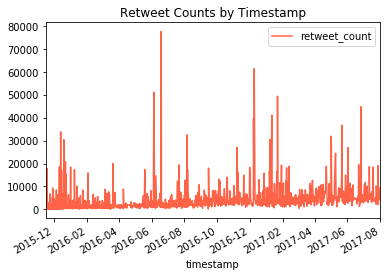

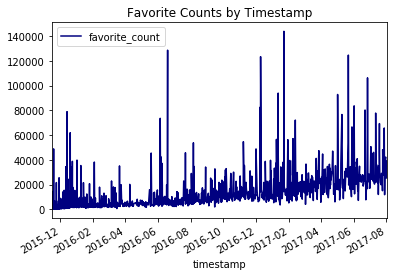

In [41]:
p1=df_rftime.plot(x='timestamp', y='retweet_count',color='Tomato', title= 'Retweet Counts by Timestamp')
plt.savefig('Retweet Counts by Timestamp')
p2=df_rftime.plot(x='timestamp', y='favorite_count',color = 'Navy',title= 'Favorite Counts by Timestamp')
plt.savefig('Favorite Counts by Timestamp')


Retweets and Favorite Counts Colored by Rating Ratio

In [42]:
df_rfratio=df_tam[['retweet_count','favorite_count','rating_numerator','rating_denominator']]

In [43]:
df_rfratio['rating_ratio']=df_rfratio['rating_numerator']/df_rfratio['rating_denominator']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
# calculate ratio and drop numerator and denominator columns
columns = ['rating_numerator','rating_denominator']
df_rfratio=df_rfratio.drop(columns,axis = 1)

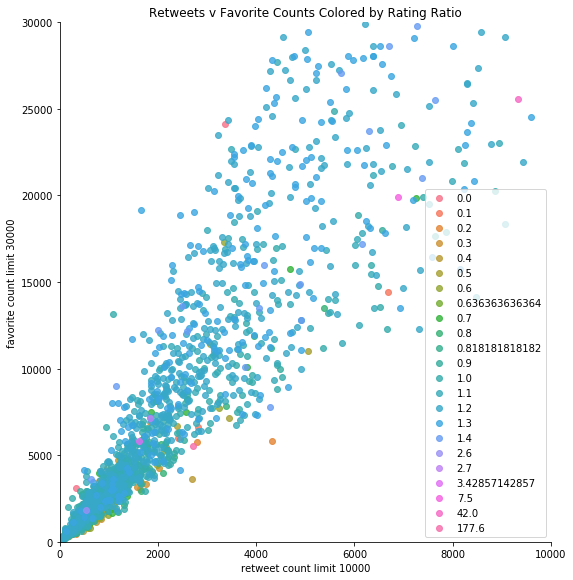

In [45]:
df_rfratio_sns = df_rfratio.copy()
sns.lmplot(x='retweet_count', y='favorite_count', data= df_rfratio_sns, fit_reg=False, hue='rating_ratio',legend=False,size=8)
plt.xlim(0,10000)
plt.ylim(0,30000)
plt.xlabel('retweet count limit 10000')
plt.ylabel('favorite count limit 30000')
plt.title('Retweets v Favorite Counts Colored by Rating Ratio')
plt.legend(loc='lower right')
plt.savefig('Retweets v Favorite Counts Colored by Rating Ratio')
plt.show()


Retweet and Favorite Count by Text Length with 10 or More Words

In [46]:
df_rftxt=df_tam[['text','retweet_count','favorite_count']]

In [47]:
# get len of text then drop unnecessary column
df_rftxt['text_length'] = df_rftxt['text'].str.split().str.len()
df_rftxt = df_rftxt.drop('text',1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
df_rftxt=df_rftxt[df_rftxt['text_length']>9]

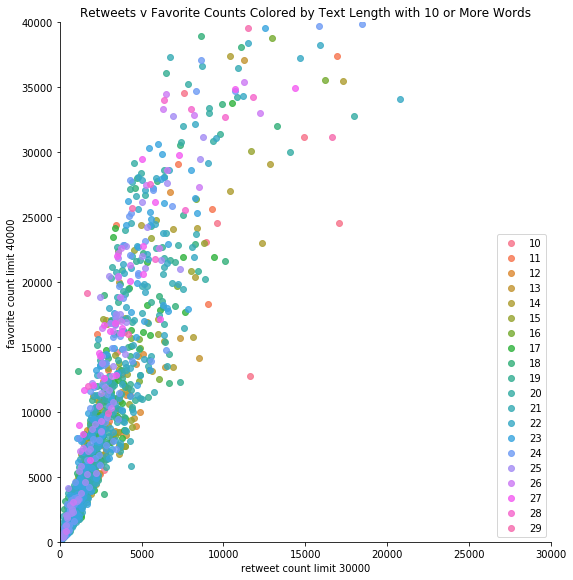

In [49]:
df_rftxt_sns = df_rftxt.copy()
sns.lmplot(x='retweet_count', y='favorite_count', data= df_rftxt_sns, fit_reg=False, hue='text_length',legend=False,size=8)
plt.xlim(0,30000)
plt.ylim(0,40000)
plt.xlabel('retweet count limit 30000')
plt.ylabel('favorite count limit 40000')
plt.title('Retweets v Favorite Counts Colored by Text Length with 10 or More Words')
plt.legend(loc='lower right')
plt.savefig('Retweets v Favorite Counts Colored by Text Length with 10 or More Words')
plt.show()
